In [23]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import norm

sns.reset_orig()

root_path = Path().cwd().parents[1]
data_path = root_path / "common" / "resources" / "datasets"
figures_path = Path().resolve() / 'figures'

# Generate data

In [3]:
x = np.linspace(-4, 4, 1000)
y = np.arctan(x) + norm.pdf(x, 1, 0.05) / 50

np.random.seed(42)
y_noisy = y + np.random.randn(len(x)) / 5

df = pd.DataFrame({"x": x, "approximated_data": y, "experimental_data": y_noisy})
df.to_csv("experiment.csv", index=False)
df.head()

,x,approximated_data,experimental_data
0,-4.000000,-1.325818,-1.226475
1,-3.991992,-1.325346,-1.352999
2,-3.983984,-1.324872,-1.195334
3,-3.975976,-1.324396,-1.019790
4,-3.967968,-1.323919,-1.370750


# Plotting Figure

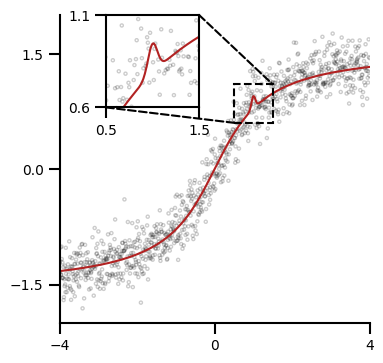

In [5]:
df = pd.read_csv(data_path / "experiment.csv")
x = df.x.to_numpy()
y = df.approximated_y.to_numpy()
y_noisy = df.y.to_numpy()

fig, main_ax = plt.subplots(figsize=(4, 4))

main_ax.set_xticks([-4, 0, 4])
main_ax.set_xlim(-4, 4)

main_ax.set_yticks([-1.5, 0, 1.5])
main_ax.set_ylim(-2, 2)

main_ax.spines[["right", "top"]].set_visible(False)


inset_ax = main_ax.inset_axes(
    [0.15, 0.7, 0.3, 0.3],
    xlim=[0.5, 1.5],
    ylim=[0.6, 1.1],
    xticks=[0.5, 1.5],
    yticks=[0.6, 1.1],
)

line_width = 1.5
for ax in main_ax, inset_ax:
    ax.scatter(
        x, y_noisy, edgecolor="k", facecolor="none", lw=1, s=5, zorder=1, alpha=0.2
    )
    ax.plot(x, y, color="firebrick", lw=line_width, zorder=2)

    ax.tick_params(which="minor", axis="both", length=4, width=line_width)
    ax.tick_params(which="major", axis="both", length=8, width=line_width)
    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(line_width)

box, pth = main_ax.indicate_inset_zoom(inset_ax, edgecolor="k", alpha=1)
for p in [box] + list(pth):
    p.set_linestyle("dashed")
    p.set_linewidth(line_width)


fig.savefig(
    figures_path / "advanced_matplotlib_lineplot.png", dpi=300, bbox_inches="tight"
)